# Calculate the Length to Height Ratio of a Flatfish

In [1]:
import cv2
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches

In [2]:
def fish_mask(flatfish):
    # use texture segmentation and smoothing to segment camouflaged fish
    flatfish = cv2.imread("./images/flatfish.jpg")
    flatfish = cv2.cvtColor(flatfish, cv2.COLOR_BGR2RGB)
    flatfish_gray = cv2.cvtColor(flatfish, cv2.COLOR_RGB2GRAY)
    flatfish_std = ndimage.generic_filter(flatfish_gray, np.std, 3)
    flatfish_std = np.interp(flatfish_std, (flatfish_std.min(), flatfish_std.max()), (0, 1))
    flatfish_filter = ndimage.median_filter(flatfish_std, 15) * 255
    _, flatfish_binary = cv2.threshold(flatfish_filter.astype(np.uint8), 127, 255, cv2.THRESH_OTSU)

    return ~flatfish_binary

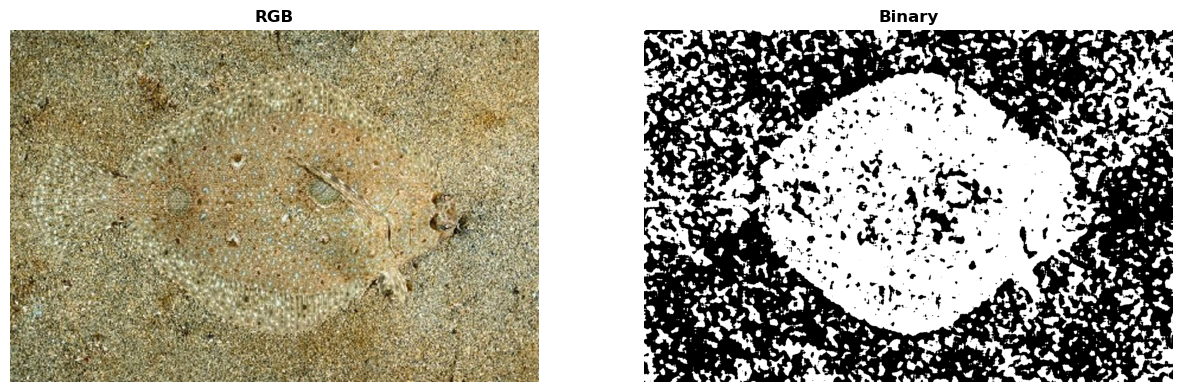

In [3]:
flatfish = cv2.imread("./images/flatfish.jpg")
flatfish = cv2.cvtColor(flatfish, cv2.COLOR_BGR2RGB)
flatfish_binary = fish_mask(flatfish)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(flatfish)
axs[0].axis('off')
axs[0].set_title('RGB')
axs[1].imshow(flatfish_binary, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Binary')
plt.show()

We can use the [regionprops()](https://scikit-image.org/docs/stable/api/skimage.measure.html#regionprops) function to keep the n largest or smallest objects when sorted by property.

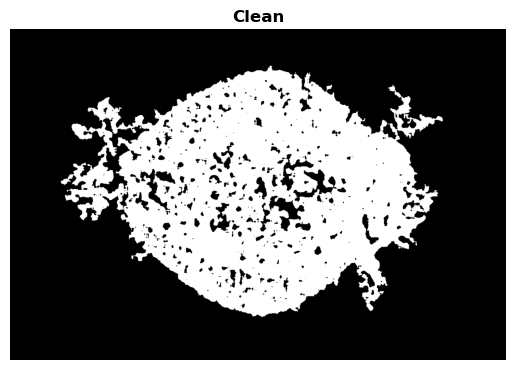

In [4]:
flatfish_label = label(flatfish_binary)
sizes = {}
for region in regionprops(flatfish_label):
    sizes[region.label] = region.area

flatfish_label[flatfish_label != max(sizes, key=sizes.get)] = 0
flatfish_clean = flatfish_label

plt.imshow(flatfish_clean, cmap='gray')
plt.axis('off')
plt.title("Clean")
plt.show()

Get the orientation of the flatfish using [regionprops()](https://scikit-image.org/docs/stable/api/skimage.measure.html#regionprops)

In [5]:
for region in regionprops(flatfish_clean):
    flatfish_orientation = region.orientation

print("flatfish orientation =", flatfish_orientation)

flatfish orientation = 1.5053296301090857


We can use [rotate()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.rotate.html#scipy-ndimage-rotate) to rotate an image counterclockwise.

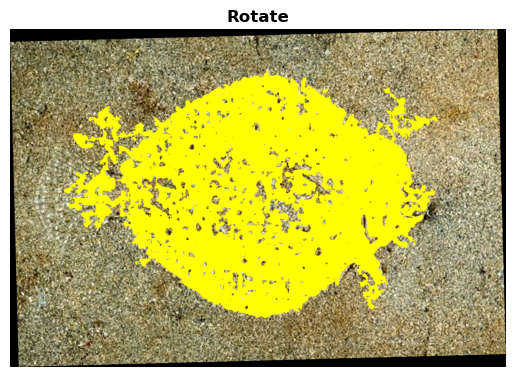

In [6]:
flatfish_rotate = ndimage.rotate(flatfish, flatfish_orientation)
flatfish_clean = ndimage.rotate(flatfish_clean, flatfish_orientation)
flatfish_clean = np.interp(flatfish_clean, (flatfish_clean.min(), flatfish_clean.max()), (0, 255))
_, flatfish_clean = cv2.threshold(flatfish_clean.astype(np.uint8), 127, 255, cv2.THRESH_OTSU)
for i in range(3):
    if i != 2:
        flatfish_rotate[flatfish_clean.astype('bool'), i] = 255
    else:
        flatfish_rotate[flatfish_clean.astype('bool'), i] = 0

plt.imshow(flatfish_rotate)
plt.axis('off')
plt.title('Rotate')
plt.show()

Get the bounding box property.

In [7]:
for region in regionprops(flatfish_clean):
    flatfish_bbox = region.bbox

print("flatfish bounding box =", flatfish_bbox)
min_row, min_col, max_row, max_col = flatfish_bbox

flatfish bounding box = (140, 179, 964, 1426)


Display bounding box.

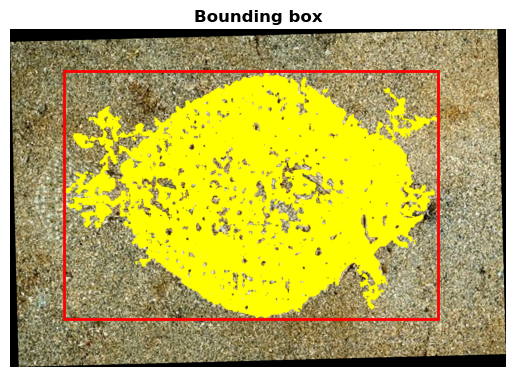

In [8]:
rect = mpatches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, fill=False, edgecolor='red', linewidth=2)

fig, ax = plt.subplots()
ax.imshow(flatfish_rotate)
ax.set_title('Bounding box')
ax.add_patch(rect)
ax.axis('off')
plt.show()

The bounding box is a 4-element vector, [x y w h] where x and y are the coordinates of the bottom left corner of the box and w and h are the width and height of the box. The ength to height ratio can be calculated with these values.

In [13]:
wt = max_col - min_col
ht = max_row - min_row

ratio = wt / ht
print(f"Lenght to Hight ratio = {ratio:.2f}")

Lenght to Hight ratio = 1.51
